In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import pycountry_convert as pc
import matplotlib.pyplot as plt
import folium
import matplotlib.dates as mdates

In [2]:
US = pd.read_csv('WeatherData/time_series_covid19_confirmed_US.csv')

USdeaths = pd.read_csv('WeatherData/time_series_covid19_deaths_US.csv')

In [3]:
dates = US.columns[11:]

datesUSdeaths = USdeaths.columns[11:]

In [4]:
US = US.melt(id_vars=['Province_State', 'Country_Region', 'Lat', 'Long_'], 
                            value_vars=dates, var_name='Date', value_name='Confirmed')

USdeaths = USdeaths.melt(id_vars=['Province_State', 'Country_Region', 'Lat', 'Long_'], 
                            value_vars=datesUSdeaths, var_name='Date', value_name='Death')


In [5]:
US = US.groupby(['Date', 'Country_Region','Province_State'])['Confirmed'].sum().reset_index()

USdeaths = USdeaths.groupby(['Date', 'Country_Region','Province_State'])['Death'].sum().reset_index()

In [6]:
US['Province_State'].unique()

array(['Alabama', 'Alaska', 'American Samoa', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware',
       'Diamond Princess', 'District of Columbia', 'Florida', 'Georgia',
       'Grand Princess', 'Guam', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Northern Mariana Islands', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Puerto Rico', 'Rhode Island',
       'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah',
       'Vermont', 'Virgin Islands', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [7]:
fullUSconfirmed = US.copy()
fullUSdeath = USdeaths.copy()

In [8]:
US = US[US['Province_State']=='New York']

USdeaths = USdeaths[USdeaths['Province_State']=='New York']

In [9]:
USdeaths.dtypes

Date              object
Country_Region    object
Province_State    object
Death              int64
dtype: object

In [10]:
US['Date'] = pd.to_datetime(US['Date'])

USdeaths['Date'] = pd.to_datetime(USdeaths['Date'])

In [11]:
US

,Date,Country_Region,Province_State,Confirmed
36,2020-01-22,US,New York,0
94,2020-01-23,US,New York,0
152,2020-01-24,US,New York,0
210,2020-01-25,US,New York,0
268,2020-01-26,US,New York,0
...,...,...,...,...
9316,2020-06-09,US,New York,379482
9374,2020-07-01,US,New York,394079
9432,2020-07-02,US,New York,394954
9490,2020-07-03,US,New York,395872


In [12]:
US = US.sort_values(by='Date', ascending=True)

USdeaths = USdeaths.sort_values(by='Date', ascending=True)

In [13]:
US['DailyCases'] = US['Confirmed'].diff()

USdeaths['DailyDeath'] = USdeaths['Death'].diff()

In [14]:
USdeaths

,Date,Country_Region,Province_State,Death,DailyDeath
4212,2020-01-22,US,New York,0,NaN
4270,2020-01-23,US,New York,0,0.0
4328,2020-01-24,US,New York,0,0.0
4386,2020-01-25,US,New York,0,0.0
4444,2020-01-26,US,New York,0,0.0
...,...,...,...,...,...
10476,2020-07-20,US,New York,32506,11.0
10534,2020-07-21,US,New York,32520,14.0
10592,2020-07-22,US,New York,32558,38.0
10650,2020-07-23,US,New York,32594,36.0


In [15]:
US

,Date,Country_Region,Province_State,Confirmed,DailyCases
36,2020-01-22,US,New York,0,NaN
94,2020-01-23,US,New York,0,0.0
152,2020-01-24,US,New York,0,0.0
210,2020-01-25,US,New York,0,0.0
268,2020-01-26,US,New York,0,0.0
...,...,...,...,...,...
8968,2020-06-30,US,New York,393454,524.0
9374,2020-07-01,US,New York,394079,625.0
9432,2020-07-02,US,New York,394954,875.0
9490,2020-07-03,US,New York,395872,918.0


In [16]:
US = pd.merge(left=US, right=USdeaths, how='left',
                      on=['Province_State', 'Country_Region', 'Date'])

In [17]:
US

,Date,Country_Region,Province_State,Confirmed,DailyCases,Death,DailyDeath
0,2020-01-22,US,New York,0,NaN,0,NaN
1,2020-01-23,US,New York,0,0.0,0,0.0
2,2020-01-24,US,New York,0,0.0,0,0.0
3,2020-01-25,US,New York,0,0.0,0,0.0
4,2020-01-26,US,New York,0,0.0,0,0.0
...,...,...,...,...,...,...,...
160,2020-06-30,US,New York,393454,524.0,32032,71.0
161,2020-07-01,US,New York,394079,625.0,32043,11.0
162,2020-07-02,US,New York,394954,875.0,32064,21.0
163,2020-07-03,US,New York,395872,918.0,32137,73.0


In [20]:
USWeather = pd.read_excel('WeatherData/USWeather.xls')
USWeather['Date'] = pd.to_datetime(USWeather['Date'], format='%d.%m.%Y %H:%M')
USWeather['Date'] = USWeather['Date'].dt.strftime('%Y-%m-%d')
USWeather = USWeather.groupby(['Date'])['T'].mean().reset_index()


US['Date'] = pd.to_datetime(US['Date'])
USWeather['Date'] = pd.to_datetime(USWeather['Date'])

# US = pd.merge(US,USWeather,how='left',left_on=['Date'],right_on=['Date'])

ImportError: Missing optional dependency 'xlrd'. Install xlrd >= 1.0.0 for Excel support Use pip or conda to install xlrd.

In [21]:
US = pd.merge(US,USWeather,how='left',left_on=['Date'],right_on=['Date'])

NameError: name 'USWeather' is not defined

In [22]:
US

,Date,Country_Region,Province_State,Confirmed,DailyCases,Death,DailyDeath
0,2020-01-22,US,New York,0,NaN,0,NaN
1,2020-01-23,US,New York,0,0.0,0,0.0
2,2020-01-24,US,New York,0,0.0,0,0.0
3,2020-01-25,US,New York,0,0.0,0,0.0
4,2020-01-26,US,New York,0,0.0,0,0.0
...,...,...,...,...,...,...,...
160,2020-06-30,US,New York,393454,524.0,32032,71.0
161,2020-07-01,US,New York,394079,625.0,32043,11.0
162,2020-07-02,US,New York,394954,875.0,32064,21.0
163,2020-07-03,US,New York,395872,918.0,32137,73.0


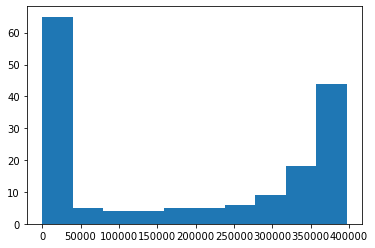

Statistics=0.788, p=0.000
Sample does not look Gaussian 


In [23]:
from matplotlib import pyplot
# histogram plot
pyplot.hist(US['Confirmed'])
pyplot.show()
# Shapiro-Wilk Test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro
# seed the random number generator
seed(1)
# generate univariate observations
data = 5 * randn(100) + 50
# normality test
stat, p = shapiro(US['Confirmed'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian')
else:
	print('Sample does not look Gaussian ')

Statistics=0.788, p=0.000
Sample does not look Gaussian (reject H0)


In [20]:
US.to_csv('WeatherData/FinalUSData.csv', encoding='utf-8', index=False)

In [21]:
USStatePopulation = pd.read_excel('Population/USPopulation.xlsx')

In [22]:
USStatePopulation

,State Name,Population,Land Area (sq mi)
0,Alabama,4858979,50744
1,Alaska,738432,571951
2,Arizona,6828065,113635
3,Arkansas,2978204,52068
4,California,39144818,155959
5,Colorado,5456574,103718
6,Connecticut,3590886,4845
7,Delaware,945934,1954
8,Florida,20271272,53927
9,Georgia,10214860,57906


In [23]:
USStatePopulation['Density (p/mi²)'] = USStatePopulation['Population']/USStatePopulation['Land Area (sq mi)'] 

In [24]:
USStatePopulation = USStatePopulation.round(1)

In [25]:
USStatePopulation

,State Name,Population,Land Area (sq mi),Density (p/mi²)
0,Alabama,4858979,50744,95.8
1,Alaska,738432,571951,1.3
2,Arizona,6828065,113635,60.1
3,Arkansas,2978204,52068,57.2
4,California,39144818,155959,251.0
5,Colorado,5456574,103718,52.6
6,Connecticut,3590886,4845,741.2
7,Delaware,945934,1954,484.1
8,Florida,20271272,53927,375.9
9,Georgia,10214860,57906,176.4


In [26]:
fullUSconfirmed['Date'] = pd.to_datetime(fullUSconfirmed['Date'])

fullUSdeath['Date'] = pd.to_datetime(fullUSdeath['Date'])

In [27]:
fullUSconfirmed = fullUSconfirmed.sort_values(by='Date', ascending=True)

fullUSdeath = fullUSdeath.sort_values(by='Date', ascending=True)

In [28]:
fullUS = pd.merge(left=fullUSconfirmed, right=fullUSdeath, how='left',
                      on=['Date', 'Country_Region', 'Province_State'])


In [29]:
fullUS

,Date,Country_Region,Province_State,Confirmed,Death
0,2020-01-22,US,Alabama,0,0
1,2020-01-22,US,Nebraska,0,0
2,2020-01-22,US,Nevada,0,0
3,2020-01-22,US,New Hampshire,0,0
4,2020-01-22,US,New Jersey,0,0
5,2020-01-22,US,New Mexico,0,0
6,2020-01-22,US,New York,0,0
7,2020-01-22,US,North Carolina,0,0
8,2020-01-22,US,North Dakota,0,0
9,2020-01-22,US,Northern Mariana Islands,0,0


In [30]:
fullUS = fullUS.groupby(['Country_Region', 'Province_State','Date'])['Confirmed', 'Death'].sum().reset_index()

In [31]:
fullUS

,Country_Region,Province_State,Date,Confirmed,Death
0,US,Alabama,2020-01-22,0,0
1,US,Alabama,2020-01-23,0,0
2,US,Alabama,2020-01-24,0,0
3,US,Alabama,2020-01-25,0,0
4,US,Alabama,2020-01-26,0,0
5,US,Alabama,2020-01-27,0,0
6,US,Alabama,2020-01-28,0,0
7,US,Alabama,2020-01-29,0,0
8,US,Alabama,2020-01-30,0,0
9,US,Alabama,2020-01-31,0,0


In [32]:
temp = fullUS.groupby(['Country_Region', 'Province_State','Date'])['Confirmed', 'Death']

In [33]:
temp = temp.sum().diff().reset_index()

In [34]:
mask = temp['Country_Region'] != temp['Country_Region'].shift(1)

In [35]:
temp.loc[mask, 'Confirmed'] = np.nan
temp.loc[mask, 'Death'] = np.nan

In [36]:
temp.columns = ['Country_Region', 'Province_State', 'Date', 'New cases', 'New deaths']

In [37]:
fullUS = pd.merge(fullUS, temp, on=['Country_Region', 'Province_State','Date'])

In [38]:
fullUS.isna().sum()

Country_Region    0
Province_State    0
Date              0
Confirmed         0
Death             0
New cases         1
New deaths        1
dtype: int64

In [39]:
fullUS = fullUS.fillna(0)

In [40]:
fullUS['New deaths'] = fullUS['New deaths'].astype('int64')
fullUS['New cases'] = fullUS['New cases'].astype('int64')

In [41]:
fullUS.dtypes

Country_Region            object
Province_State            object
Date              datetime64[ns]
Confirmed                  int64
Death                      int64
New cases                  int64
New deaths                 int64
dtype: object

In [42]:
fullUS[fullUS['Province_State']=='Alabama']

,Country_Region,Province_State,Date,Confirmed,Death,New cases,New deaths
0,US,Alabama,2020-01-22,0,0,0,0
1,US,Alabama,2020-01-23,0,0,0,0
2,US,Alabama,2020-01-24,0,0,0,0
3,US,Alabama,2020-01-25,0,0,0,0
4,US,Alabama,2020-01-26,0,0,0,0
5,US,Alabama,2020-01-27,0,0,0,0
6,US,Alabama,2020-01-28,0,0,0,0
7,US,Alabama,2020-01-29,0,0,0,0
8,US,Alabama,2020-01-30,0,0,0,0
9,US,Alabama,2020-01-31,0,0,0,0


In [43]:
USStatePopulation

,State Name,Population,Land Area (sq mi),Density (p/mi²)
0,Alabama,4858979,50744,95.8
1,Alaska,738432,571951,1.3
2,Arizona,6828065,113635,60.1
3,Arkansas,2978204,52068,57.2
4,California,39144818,155959,251.0
5,Colorado,5456574,103718,52.6
6,Connecticut,3590886,4845,741.2
7,Delaware,945934,1954,484.1
8,Florida,20271272,53927,375.9
9,Georgia,10214860,57906,176.4


In [45]:
fullUS[~(fullUS['Province_State'].isin(USStatePopulation['State Name']))]['Province_State'].unique()

array(['American Samoa', 'Diamond Princess', 'District of Columbia',
       'Grand Princess', 'Guam', 'Northern Mariana Islands',
       'Puerto Rico', 'Virgin Islands'], dtype=object)

In [46]:
fullUS.drop_duplicates(subset='Province_State',keep='last',inplace=True)

In [47]:
fullUS = pd.merge(fullUS, USStatePopulation, left_on=['Province_State'],right_on=['State Name'])

In [48]:
fullUS

,Country_Region,Province_State,Date,Confirmed,Death,New cases,New deaths,State Name,Population,Land Area (sq mi),Density (p/mi²)
0,US,Alabama,2020-07-04,42862,1007,997,1,Alabama,4858979,50744,95.8
1,US,Alaska,2020-07-04,1107,16,47,1,Alaska,738432,571951,1.3
2,US,Arizona,2020-07-04,94567,1817,2695,19,Arizona,6828065,113635,60.1
3,US,Arkansas,2020-07-04,23209,286,587,5,Arkansas,2978204,52068,57.2
4,US,California,2020-07-04,252895,6334,2381,19,California,39144818,155959,251.0
5,US,Colorado,2020-07-04,33849,1701,254,0,Colorado,5456574,103718,52.6
6,US,Connecticut,2020-07-04,46717,4335,0,0,Connecticut,3590886,4845,741.2
7,US,Delaware,2020-07-04,11996,512,73,0,Delaware,945934,1954,484.1
8,US,Florida,2020-07-04,190052,3702,11458,18,Florida,20271272,53927,375.9
9,US,Georgia,2020-07-04,93319,2857,2826,0,Georgia,10214860,57906,176.4


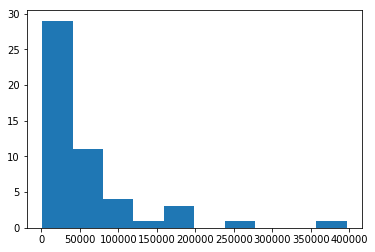

Statistics=0.697, p=0.000
Sample does not look Gaussian (reject H0)


In [54]:
from matplotlib import pyplot
# histogram plot
pyplot.hist(fullUS['Confirmed'])
pyplot.show()
# Shapiro-Wilk Test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro
# seed the random number generator
seed(1)
# generate univariate observations
data = 5 * randn(100) + 50
# normality test
stat, p = shapiro(fullUS['Confirmed'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

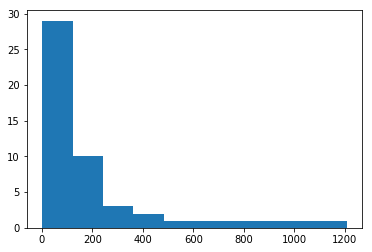

Statistics=0.691, p=0.000
Sample does not look Gaussian (reject H0)


In [55]:
from matplotlib import pyplot
# histogram plot
pyplot.hist(fullUS['Density (p/mi²)'])
pyplot.show()
# Shapiro-Wilk Test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro
# seed the random number generator
seed(1)
# generate univariate observations
data = 5 * randn(100) + 50
# normality test
stat, p = shapiro(fullUS['Density (p/mi²)'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

In [ ]:
fullUS.to_csv('Population/FinalUSPopulationData.csv', encoding='utf-8', index=False)

In [56]:
Canada = pd.read_csv('WeatherData/CanadaData.csv')

In [57]:
Canada = Canada[Canada['Province']=='QUEBEC']

In [58]:
Canada['Province'].unique()

array(['QUEBEC'], dtype=object)

In [59]:
Canada

,OBJECTID,Province,Abbreviation,DailyTotals,SummaryDate,TotalCases,TotalRecovered,DailyRecovered,TotalDeaths,DailyDeaths,TotalTested,DailyTested,TotalActive,DailyActive,TotalHospitalized,DailyHospitalized,TotalICU,DailyICU
13,14,QUEBEC,QC,0,2020/01/25 12:00:00+00,0,0,0,0,0,0,0,0,0.0,NaN,NaN,NaN,NaN
19,20,QUEBEC,QC,0,2020/01/26 12:00:00+00,0,0,0,0,0,0,0,0,0.0,NaN,NaN,NaN,NaN
33,34,QUEBEC,QC,0,2020/01/27 12:00:00+00,0,0,0,0,0,0,0,0,0.0,NaN,NaN,NaN,NaN
46,47,QUEBEC,QC,0,2020/01/28 12:00:00+00,0,0,0,0,0,0,0,0,0.0,NaN,NaN,NaN,NaN
62,63,QUEBEC,QC,0,2020/01/29 12:00:00+00,0,0,0,0,0,0,0,0,0.0,NaN,NaN,NaN,NaN
73,74,QUEBEC,QC,0,2020/01/30 12:00:00+00,0,0,0,0,0,0,0,0,0.0,NaN,NaN,NaN,NaN
86,87,QUEBEC,QC,0,2020/01/31 12:00:00+00,0,0,0,0,0,0,0,0,0.0,NaN,NaN,NaN,NaN
100,101,QUEBEC,QC,0,2020/02/01 12:00:00+00,0,0,0,0,0,0,0,0,0.0,NaN,NaN,NaN,NaN
116,117,QUEBEC,QC,0,2020/02/02 12:00:00+00,0,0,0,0,0,0,0,0,0.0,NaN,NaN,NaN,NaN
131,132,QUEBEC,QC,0,2020/02/03 12:00:00+00,0,0,0,0,0,0,0,0,0.0,NaN,NaN,NaN,NaN


In [60]:
Canada['Date'] = [d.date() for d in pd.to_datetime(Canada['SummaryDate'])]

In [61]:
CanadaWeather = pd.read_excel('WeatherData/CanadaWeather.xls')

In [62]:
CanadaWeather['Date'] = pd.to_datetime(CanadaWeather['Date'], format='%d.%m.%Y %H:%M')

In [63]:
CanadaWeather['Date'] = CanadaWeather['Date'].dt.strftime('%Y-%m-%d')

In [64]:
CanadaWeather = CanadaWeather.groupby(['Date'])['T'].mean().reset_index()

In [65]:
Canada['Date'] = pd.to_datetime(Canada['Date'])
CanadaWeather['Date'] = pd.to_datetime(CanadaWeather['Date'])


In [66]:
Canada = pd.merge(Canada,CanadaWeather,how='left',left_on=['Date'],right_on=['Date'])

In [69]:
Canada

,OBJECTID,Province,Abbreviation,DailyTotals,SummaryDate,TotalCases,TotalRecovered,DailyRecovered,TotalDeaths,DailyDeaths,TotalTested,DailyTested,TotalActive,DailyActive,TotalHospitalized,DailyHospitalized,TotalICU,DailyICU,Date,T
0,14,QUEBEC,QC,0,2020/01/25 12:00:00+00,0,0,0,0,0,0,0,0,0.0,NaN,NaN,NaN,NaN,2020-01-25,-2.916667
1,20,QUEBEC,QC,0,2020/01/26 12:00:00+00,0,0,0,0,0,0,0,0,0.0,NaN,NaN,NaN,NaN,2020-01-26,-0.875000
2,34,QUEBEC,QC,0,2020/01/27 12:00:00+00,0,0,0,0,0,0,0,0,0.0,NaN,NaN,NaN,NaN,2020-01-27,-0.166667
3,47,QUEBEC,QC,0,2020/01/28 12:00:00+00,0,0,0,0,0,0,0,0,0.0,NaN,NaN,NaN,NaN,2020-01-28,-4.750000
4,63,QUEBEC,QC,0,2020/01/29 12:00:00+00,0,0,0,0,0,0,0,0,0.0,NaN,NaN,NaN,NaN,2020-01-29,-9.750000
5,74,QUEBEC,QC,0,2020/01/30 12:00:00+00,0,0,0,0,0,0,0,0,0.0,NaN,NaN,NaN,NaN,2020-01-30,-12.304348
6,87,QUEBEC,QC,0,2020/01/31 12:00:00+00,0,0,0,0,0,0,0,0,0.0,NaN,NaN,NaN,NaN,2020-01-31,-10.041667
7,101,QUEBEC,QC,0,2020/02/01 12:00:00+00,0,0,0,0,0,0,0,0,0.0,NaN,NaN,NaN,NaN,2020-02-01,-5.875000
8,117,QUEBEC,QC,0,2020/02/02 12:00:00+00,0,0,0,0,0,0,0,0,0.0,NaN,NaN,NaN,NaN,2020-02-02,-4.833333
9,132,QUEBEC,QC,0,2020/02/03 12:00:00+00,0,0,0,0,0,0,0,0,0.0,NaN,NaN,NaN,NaN,2020-02-03,-3.000000


In [68]:
Canada = Canada[Canada['T'].notnull()]

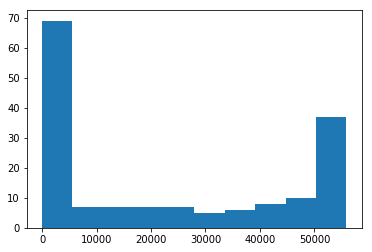

Statistics=0.800, p=0.000
Sample does not look Gaussian (reject H0)


In [70]:
from matplotlib import pyplot
# histogram plot
pyplot.hist(Canada['TotalCases'])
pyplot.show()
# Shapiro-Wilk Test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro
# seed the random number generator
seed(1)
# generate univariate observations
data = 5 * randn(100) + 50
# normality test
stat, p = shapiro(Canada['TotalCases'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

In [30]:
Canada.to_csv('WeatherData/FinalCanadaData.csv', encoding='utf-8', index=False)

In [59]:
India = pd.read_csv('WeatherData/IndiaData.csv')

In [60]:
India2 = India.copy()

In [4]:
India['Name of State / UT'].unique()

array(['Kerala', 'Delhi', 'Telengana', 'Haryana', 'Rajasthan',
       'Uttar Pradesh', 'Tamil Nadu', 'Union Territory of Ladakh',
       'Karnataka', 'Maharashtra', 'Punjab',
       'Union Territory of Jammu and Kashmir', 'Andhra Pradesh',
       'Uttarakhand', 'Odisha', 'Puducherry', 'West Bengal',
       'Chhattisgarh', 'Union Territory of Chandigarh', 'Gujarat',
       'Chandigarh', 'Himachal Pradesh', 'Jammu and Kashmir', 'Ladakh',
       'Madhya Pradesh', 'Bihar', 'Manipur', 'Mizoram',
       'Andaman and Nicobar Islands', 'Goa', 'Assam', 'Jharkhand',
       'Arunachal Pradesh', 'Tripura', 'Meghalaya',
       'Dadra and Nagar Haveli and Daman and Diu', 'Sikkim', 'Nagaland',
       'Telangana'], dtype=object)

In [5]:
India[India['Name of State / UT'].isnull()]

,Date,Name of State / UT,Latitude,Longitude,Total Confirmed cases,Death,Cured/Discharged/Migrated,New cases,New deaths,New recovered


In [6]:
India['Name of State / UT'].nunique()

39

In [7]:
India = India[India['Name of State / UT']=='Maharashtra']

In [8]:
India

,Date,Name of State / UT,Latitude,Longitude,Total Confirmed cases,Death,Cured/Discharged/Migrated,New cases,New deaths,New recovered
76,2020-03-09,Maharashtra,19.7515,75.7139,2,0,0,0,0,0
88,2020-03-10,Maharashtra,19.7515,75.7139,5,0,0,3,0,0
100,2020-03-11,Maharashtra,19.7515,75.7139,10,0,0,5,0,0
113,2020-03-12,Maharashtra,19.7515,75.7139,11,0,0,1,0,0
126,2020-03-13,Maharashtra,19.7515,75.7139,11,0,0,0,0,0
139,2020-03-14,Maharashtra,19.7515,75.7139,14,0,0,3,0,0
152,2020-03-15,Maharashtra,19.7515,75.7139,32,0,0,18,0,0
166,2020-03-16,Maharashtra,19.7515,75.7139,32,0,0,0,0,0
181,2020-03-17,Maharashtra,19.7515,75.7139,39,1,0,7,1,0
196,2020-03-18,Maharashtra,19.7515,75.7139,42,1,0,3,0,0


In [9]:
Indiaweather = pd.read_excel('WeatherData/IndiaWeather.xls')
Indiaweather['Date'] = pd.to_datetime(Indiaweather['Date'], format='%d.%m.%Y %H:%M')
Indiaweather['Date'] = Indiaweather['Date'].dt.strftime('%Y-%m-%d')
Indiaweather = Indiaweather.groupby(['Date'])['T'].mean().reset_index()


India['Date'] = pd.to_datetime(India['Date'])
Indiaweather['Date'] = pd.to_datetime(Indiaweather['Date'])

In [10]:
Indiaweather

,Date,T
0,2020-01-01,21.525000
1,2020-01-02,22.825000
2,2020-01-03,22.175000
3,2020-01-04,21.375000
4,2020-01-05,24.150000
5,2020-01-06,26.325000
6,2020-01-07,25.425000
7,2020-01-08,25.375000
8,2020-01-09,22.450000
9,2020-01-10,25.100000


In [11]:
India

,Date,Name of State / UT,Latitude,Longitude,Total Confirmed cases,Death,Cured/Discharged/Migrated,New cases,New deaths,New recovered
76,2020-03-09,Maharashtra,19.7515,75.7139,2,0,0,0,0,0
88,2020-03-10,Maharashtra,19.7515,75.7139,5,0,0,3,0,0
100,2020-03-11,Maharashtra,19.7515,75.7139,10,0,0,5,0,0
113,2020-03-12,Maharashtra,19.7515,75.7139,11,0,0,1,0,0
126,2020-03-13,Maharashtra,19.7515,75.7139,11,0,0,0,0,0
139,2020-03-14,Maharashtra,19.7515,75.7139,14,0,0,3,0,0
152,2020-03-15,Maharashtra,19.7515,75.7139,32,0,0,18,0,0
166,2020-03-16,Maharashtra,19.7515,75.7139,32,0,0,0,0,0
181,2020-03-17,Maharashtra,19.7515,75.7139,39,1,0,7,1,0
196,2020-03-18,Maharashtra,19.7515,75.7139,42,1,0,3,0,0


In [12]:
India = pd.merge(India,Indiaweather,how='left',left_on=['Date'],right_on=['Date'])

In [13]:
India

,Date,Name of State / UT,Latitude,Longitude,Total Confirmed cases,Death,Cured/Discharged/Migrated,New cases,New deaths,New recovered,T
0,2020-03-09,Maharashtra,19.7515,75.7139,2,0,0,0,0,0,24.900000
1,2020-03-10,Maharashtra,19.7515,75.7139,5,0,0,3,0,0,25.950000
2,2020-03-11,Maharashtra,19.7515,75.7139,10,0,0,5,0,0,25.575000
3,2020-03-12,Maharashtra,19.7515,75.7139,11,0,0,1,0,0,24.750000
4,2020-03-13,Maharashtra,19.7515,75.7139,11,0,0,0,0,0,24.050000
5,2020-03-14,Maharashtra,19.7515,75.7139,14,0,0,3,0,0,25.475000
6,2020-03-15,Maharashtra,19.7515,75.7139,32,0,0,18,0,0,26.325000
7,2020-03-16,Maharashtra,19.7515,75.7139,32,0,0,0,0,0,28.275000
8,2020-03-17,Maharashtra,19.7515,75.7139,39,1,0,7,1,0,27.875000
9,2020-03-18,Maharashtra,19.7515,75.7139,42,1,0,3,0,0,27.725000


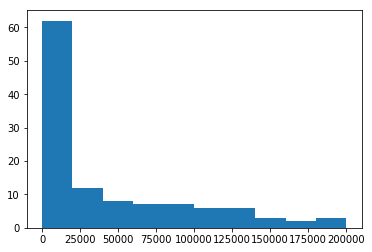

Statistics=0.793, p=0.000
Sample does not look Gaussian (reject H0)


In [14]:
from matplotlib import pyplot
# histogram plot
pyplot.hist(India['Total Confirmed cases'])
pyplot.show()
# Shapiro-Wilk Test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro
# seed the random number generator
seed(1)
# generate univariate observations
data = 5 * randn(100) + 50
# normality test
stat, p = shapiro(India['Total Confirmed cases'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

In [15]:
India.to_csv('WeatherData/FinalIndiaData.csv', encoding='utf-8', index=False)

In [61]:
IndiaPopulation = pd.read_excel('Population/IndiaStatePopulation.xlsx')

In [62]:
IndiaPopulation.dtypes

State          object
Population     object
Area           object
Density       float64
dtype: object

In [63]:
IndiaPopulation = IndiaPopulation.rename({'Density': 'Population Density'}, axis=1)

In [64]:
IndiaPopulation.dtypes

State                  object
Population             object
Area                   object
Population Density    float64
dtype: object

In [65]:
IndiaPopulation

,State,Population,Area,Population Density
0,NaN,NaN,NaN,NaN
1,Uttar Pradesh,199812341,"240,928 km2 (93,023 sq mi)",2140.0
2,Maharashtra,112374333,"307,713 km2 (118,809 sq mi)",950.0
3,Bihar,104099452,"94,163 km2 (36,357 sq mi)",2850.0
4,West Bengal,91276115,"88,752 km2 (34,267 sq mi)",2670.0
5,Madhya Pradesh,72626809,"308,245 km2 (119,014 sq mi)",610.0
6,Tamil Nadu,72147030,"130,058 km2 (50,216 sq mi)",1440.0
7,Rajasthan,68548437,"342,239 km2 (132,139 sq mi)",520.0
8,Karnataka,61095297,"191,791 km2 (74,051 sq mi)",830.0
9,Gujarat,60439692,"196,024 km2 (75,685 sq mi)",800.0


In [66]:
IndiaPopulation = IndiaPopulation.iloc[1:]

In [67]:
IndiaPopulation

,State,Population,Area,Population Density
1,Uttar Pradesh,199812341,"240,928 km2 (93,023 sq mi)",2140.0
2,Maharashtra,112374333,"307,713 km2 (118,809 sq mi)",950.0
3,Bihar,104099452,"94,163 km2 (36,357 sq mi)",2850.0
4,West Bengal,91276115,"88,752 km2 (34,267 sq mi)",2670.0
5,Madhya Pradesh,72626809,"308,245 km2 (119,014 sq mi)",610.0
6,Tamil Nadu,72147030,"130,058 km2 (50,216 sq mi)",1440.0
7,Rajasthan,68548437,"342,239 km2 (132,139 sq mi)",520.0
8,Karnataka,61095297,"191,791 km2 (74,051 sq mi)",830.0
9,Gujarat,60439692,"196,024 km2 (75,685 sq mi)",800.0
10,Andhra Pradesh,"49,577,103[b]","162,968 km2 (62,922 sq mi)",780.0


In [68]:
India2['Name of State / UT'].unique()

array(['Kerala', 'Delhi', 'Telengana', 'Haryana', 'Rajasthan',
       'Uttar Pradesh', 'Tamil Nadu', 'Union Territory of Ladakh',
       'Karnataka', 'Maharashtra', 'Punjab',
       'Union Territory of Jammu and Kashmir', 'Andhra Pradesh',
       'Uttarakhand', 'Odisha', 'Puducherry', 'West Bengal',
       'Chhattisgarh', 'Union Territory of Chandigarh', 'Gujarat',
       'Chandigarh', 'Himachal Pradesh', 'Jammu and Kashmir', 'Ladakh',
       'Madhya Pradesh', 'Bihar', 'Manipur', 'Mizoram',
       'Andaman and Nicobar Islands', 'Goa', 'Assam', 'Jharkhand',
       'Arunachal Pradesh', 'Tripura', 'Meghalaya',
       'Dadra and Nagar Haveli and Daman and Diu', 'Sikkim', 'Nagaland',
       'Telangana'], dtype=object)

In [69]:
IndiaPopulation.loc[IndiaPopulation['State']=='Telangana','State'] = 'Telengana'


In [70]:
India2[~(India2['Name of State / UT'].isin(IndiaPopulation['State']))]['Name of State / UT'].unique()

array(['Union Territory of Ladakh',
       'Union Territory of Jammu and Kashmir',
       'Union Territory of Chandigarh', 'Manipur', 'Telangana'],
      dtype=object)

In [71]:
India2 = India2.groupby(['Name of State / UT'])['Total Confirmed cases','Death'].sum().reset_index()


In [72]:
India2 = pd.merge(India2,IndiaPopulation,how='left',left_on=['Name of State / UT'],right_on=['State'])

In [73]:
India2

,Name of State / UT,Total Confirmed cases,Death,State,Population,Area,Population Density
0,Andaman and Nicobar Islands,3164,0,Andaman and Nicobar Islands,380581,"8,249 km2 (3,185 sq mi)",120.0
1,Andhra Pradesh,344489,5256,Andhra Pradesh,"49,577,103[b]","162,968 km2 (62,922 sq mi)",780.0
2,Arunachal Pradesh,3384,7,Arunachal Pradesh,1383727,"83,743 km2 (32,333 sq mi)",44.0
3,Assam,154226,335,Assam,31205576,"78,438 km2 (30,285 sq mi)",1030.0
4,Bihar,268536,1737,Bihar,104099452,"94,163 km2 (36,357 sq mi)",2850.0
5,Chandigarh,18262,248,Chandigarh,1055450,114 km2 (44 sq mi),23960.0
6,Chhattisgarh,61196,260,Chhattisgarh,25545198,"135,191 km2 (52,198 sq mi)",490.0
7,Dadra and Nagar Haveli and Daman and Diu,2501,0,Dadra and Nagar Haveli and Daman and Diu,585764,603 km2 (233 sq mi),2500.0
8,Delhi,1940322,57936,Delhi,16787941,"1,484 km2 (573 sq mi)",29260.0
9,Goa,22096,28,Goa,1458545,"3,702 km2 (1,429 sq mi)",1020.0


In [74]:
India2[India2['Population Density'].isnull()]['Name of State / UT'].unique()

array(['Manipur', 'Telangana', 'Union Territory of Chandigarh',
       'Union Territory of Jammu and Kashmir',
       'Union Territory of Ladakh'], dtype=object)

In [75]:
India2 = India2[India2['Population Density'].notnull()]

In [77]:
India2.to_csv('Population/FinalIndiaPopulation.csv', encoding='utf-8', index=False)

In [207]:
UKDeath = pd.read_csv('WeatherData/DeathsData.csv')

In [208]:
UKDeath

,NHS England Region,Unnamed: 1,Up to 01-Mar-20,01-Mar-20,02-Mar-20,03-Mar-20,04-Mar-20,05-Mar-20,06-Mar-20,07-Mar-20,...,16-Jul-20,17-Jul-20,18-Jul-20,19-Jul-20,20-Jul-20,21-Jul-20,22-Jul-20,23-Jul-20,24-Jul-20,25-Jul-20
0,England,NaN,0.0,0.0,1.0,2.0,0.0,2.0,2.0,0.0,...,9.0,9.0,15.0,10.0,8.0,7.0,9.0,11.0,3.0,1.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,East Of England,NaN,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
3,London,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,2.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0
4,Midlands,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,2.0,2.0,3.0,3.0,3.0,0.0,2.0,5.0,1.0,0.0
5,North East And Yorkshire,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1.0,2.0,2.0,1.0,1.0,4.0,0.0,0.0,1.0
6,North West,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,2.0,4.0,4.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0
7,South East,NaN,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,3.0,1.0,4.0,2.0,3.0,4.0,2.0,2.0,1.0,0.0
8,South West,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [209]:
dates = UKDeath.columns[3:]

In [210]:
UKDeath = UKDeath.melt(id_vars=['NHS England Region'], 
                            value_vars=dates, var_name='Date', value_name='Deaths')

In [211]:
UKDeath

,NHS England Region,Date,Deaths
0,England,01-Mar-20,0.0
1,NaN,01-Mar-20,NaN
2,East Of England,01-Mar-20,0.0
3,London,01-Mar-20,0.0
4,Midlands,01-Mar-20,0.0
5,North East And Yorkshire,01-Mar-20,0.0
6,North West,01-Mar-20,0.0
7,South East,01-Mar-20,0.0
8,South West,01-Mar-20,0.0
9,England,02-Mar-20,1.0


In [212]:
UKDeath = UKDeath.groupby(['Date', 'NHS England Region'])['Deaths'].sum().reset_index()

In [213]:
UKDeath = UKDeath[UKDeath['NHS England Region']=='London']

In [214]:
UKDeath['Date'] = pd.to_datetime(UKDeath['Date'])

In [215]:
UKDeath.sort_values(by='Date',ascending=True,inplace=True)

In [216]:
UK = pd.read_csv('WeatherData/UKData.csv')

In [217]:
UK

,date,area_name,new_cases,total_cases
0,2020-01-30,London,0,0
1,2020-01-31,London,0,0
2,2020-02-01,London,0,0
3,2020-02-02,London,0,0
4,2020-02-03,London,0,0
5,2020-02-04,London,0,0
6,2020-02-05,London,0,0
7,2020-02-06,London,0,0
8,2020-02-07,London,0,0
9,2020-02-08,London,0,0


In [218]:
UK = UK[UK['area_name']=='London']

In [219]:
UK['area_name'].unique()

array(['London'], dtype=object)

In [220]:
UK

,date,area_name,new_cases,total_cases
0,2020-01-30,London,0,0
1,2020-01-31,London,0,0
2,2020-02-01,London,0,0
3,2020-02-02,London,0,0
4,2020-02-03,London,0,0
5,2020-02-04,London,0,0
6,2020-02-05,London,0,0
7,2020-02-06,London,0,0
8,2020-02-07,London,0,0
9,2020-02-08,London,0,0


In [221]:
UK['date'] = pd.to_datetime(UK['date'])

C:\Users\z0042f9s\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [222]:
UK = pd.merge(UK,UKDeath,how='left',left_on=['date'],right_on=['Date'])

In [223]:
UK.drop(columns=['NHS England Region','Date'],inplace=True)

In [224]:
UK

,date,area_name,new_cases,total_cases,Deaths
0,2020-01-30,London,0,0,NaN
1,2020-01-31,London,0,0,NaN
2,2020-02-01,London,0,0,NaN
3,2020-02-02,London,0,0,NaN
4,2020-02-03,London,0,0,NaN
5,2020-02-04,London,0,0,NaN
6,2020-02-05,London,0,0,NaN
7,2020-02-06,London,0,0,NaN
8,2020-02-07,London,0,0,NaN
9,2020-02-08,London,0,0,NaN


In [225]:
Ukweather = pd.read_excel('WeatherData/UKWeather.xls')
Ukweather['Date'] = pd.to_datetime(Ukweather['Date'], format='%d.%m.%Y %H:%M')
Ukweather['Date'] = Ukweather['Date'].dt.strftime('%Y-%m-%d')
Ukweather = Ukweather.groupby(['Date'])['T'].mean().reset_index()



Ukweather['Date'] = pd.to_datetime(Ukweather['Date'])

In [226]:
Ukweather

,Date,T
0,2020-01-01,5.291667
1,2020-01-02,9.500000
2,2020-01-03,9.270833
3,2020-01-04,7.354167
4,2020-01-05,8.500000
5,2020-01-06,8.437500
6,2020-01-07,10.416667
7,2020-01-08,12.042553
8,2020-01-09,12.042553
9,2020-01-10,7.166667


In [227]:
UK

,date,area_name,new_cases,total_cases,Deaths
0,2020-01-30,London,0,0,NaN
1,2020-01-31,London,0,0,NaN
2,2020-02-01,London,0,0,NaN
3,2020-02-02,London,0,0,NaN
4,2020-02-03,London,0,0,NaN
5,2020-02-04,London,0,0,NaN
6,2020-02-05,London,0,0,NaN
7,2020-02-06,London,0,0,NaN
8,2020-02-07,London,0,0,NaN
9,2020-02-08,London,0,0,NaN


In [228]:
UK = pd.merge(UK,Ukweather,how='left',left_on=['date'],right_on=['Date'])

In [233]:
UK

,date,area_name,new_cases,total_cases,Deaths,Date,T
0,2020-01-30,London,0,0,0.0,2020-01-30,10.937500
1,2020-01-31,London,0,0,0.0,2020-01-31,11.604167
2,2020-02-01,London,0,0,0.0,2020-02-01,10.750000
3,2020-02-02,London,0,0,0.0,2020-02-02,11.104167
4,2020-02-03,London,0,0,0.0,2020-02-03,10.166667
5,2020-02-04,London,0,0,0.0,2020-02-04,7.833333
6,2020-02-05,London,0,0,0.0,2020-02-05,6.617021
7,2020-02-06,London,0,0,0.0,2020-02-06,5.812500
8,2020-02-07,London,0,0,0.0,2020-02-07,6.625000
9,2020-02-08,London,0,0,0.0,2020-02-08,10.021739


In [231]:
UK['Deaths'] = UK['Deaths'].fillna(0)

In [235]:
UK['Deaths'] = UK['Deaths'].astype('int64')

In [236]:
UK.to_csv('WeatherData/FinalUKData.csv', encoding='utf-8', index=False)

In [135]:
Itlay = pd.read_csv('WeatherData/ItlayData.csv')

In [136]:
Itlay

,SNo,Date,Country,RegionCode,RegionName,Latitude,Longitude,HospitalizedPatients,IntensiveCarePatients,TotalHospitalizedPatients,HomeConfinement,CurrentPositiveCases,NewPositiveCases,Recovered,Deaths,TotalPositiveCases,TestsPerformed
0,0,2020-02-24T18:00:00,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,0,0,0,0,0,NaN
1,1,2020-02-24T18:00:00,ITA,17,Basilicata,40.639471,15.805148,0,0,0,0,0,0,0,0,0,NaN
2,2,2020-02-24T18:00:00,ITA,18,Calabria,38.905976,16.594402,0,0,0,0,0,0,0,0,0,NaN
3,3,2020-02-24T18:00:00,ITA,15,Campania,40.839566,14.250850,0,0,0,0,0,0,0,0,0,NaN
4,4,2020-02-24T18:00:00,ITA,8,Emilia-Romagna,44.494367,11.341721,10,2,12,6,18,18,0,0,18,NaN
5,5,2020-02-24T18:00:00,ITA,6,Friuli Venezia Giulia,45.649435,13.768136,0,0,0,0,0,0,0,0,0,NaN
6,6,2020-02-24T18:00:00,ITA,12,Lazio,41.892770,12.483667,1,1,2,0,2,2,1,0,3,NaN
7,7,2020-02-24T18:00:00,ITA,7,Liguria,44.411493,8.932699,0,0,0,0,0,0,0,0,0,NaN
8,8,2020-02-24T18:00:00,ITA,3,Lombardia,45.466794,9.190347,76,19,95,71,166,166,0,6,172,NaN
9,9,2020-02-24T18:00:00,ITA,11,Marche,43.616760,13.518875,0,0,0,0,0,0,0,0,0,NaN


In [138]:
Itlay = Itlay[Itlay['RegionName']=='Lombardia']

In [139]:
Itlay['RegionName'].unique()

array(['Lombardia'], dtype=object)

In [140]:
Itlay

,SNo,Date,Country,RegionCode,RegionName,Latitude,Longitude,HospitalizedPatients,IntensiveCarePatients,TotalHospitalizedPatients,HomeConfinement,CurrentPositiveCases,NewPositiveCases,Recovered,Deaths,TotalPositiveCases,TestsPerformed
8,8,2020-02-24T18:00:00,ITA,3,Lombardia,45.466794,9.190347,76,19,95,71,166,166,0,6,172,NaN
29,29,2020-02-25T18:00:00,ITA,3,Lombardia,45.466794,9.190347,79,25,104,127,231,68,0,9,240,NaN
50,50,2020-02-26T18:00:00,ITA,3,Lombardia,45.466794,9.190347,79,25,104,145,249,18,0,9,258,NaN
71,71,2020-02-27T18:00:00,ITA,3,Lombardia,45.466794,9.190347,172,41,213,136,349,145,40,14,403,NaN
92,92,2020-02-28T18:00:00,ITA,3,Lombardia,45.466794,9.190347,235,47,282,192,474,128,40,17,531,NaN
113,113,2020-02-29T17:00:00,ITA,3,Lombardia,45.466794,9.190347,256,80,336,216,552,84,40,23,615,NaN
134,134,2020-03-01T17:00:00,ITA,3,Lombardia,45.466794,9.190347,406,106,512,375,887,369,73,24,984,NaN
155,155,2020-03-02T18:00:00,ITA,3,Lombardia,45.466794,9.190347,478,127,605,472,1077,270,139,38,1254,NaN
176,176,2020-03-03T18:00:00,ITA,3,Lombardia,45.466794,9.190347,698,167,865,461,1326,266,139,55,1520,NaN
197,197,2020-03-04T17:00:00,ITA,3,Lombardia,45.466794,9.190347,877,209,1086,411,1497,300,250,73,1820,NaN


In [141]:
Itlay['Date'] = pd.to_datetime(Itlay['Date'], format='%Y-%m-%dT%H:%M:%S')

C:\Users\z0042f9s\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [142]:
Itlay['Date'] = Itlay['Date'].dt.strftime('%Y-%m-%d')


C:\Users\z0042f9s\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [143]:
Itlay

,SNo,Date,Country,RegionCode,RegionName,Latitude,Longitude,HospitalizedPatients,IntensiveCarePatients,TotalHospitalizedPatients,HomeConfinement,CurrentPositiveCases,NewPositiveCases,Recovered,Deaths,TotalPositiveCases,TestsPerformed
8,8,2020-02-24,ITA,3,Lombardia,45.466794,9.190347,76,19,95,71,166,166,0,6,172,NaN
29,29,2020-02-25,ITA,3,Lombardia,45.466794,9.190347,79,25,104,127,231,68,0,9,240,NaN
50,50,2020-02-26,ITA,3,Lombardia,45.466794,9.190347,79,25,104,145,249,18,0,9,258,NaN
71,71,2020-02-27,ITA,3,Lombardia,45.466794,9.190347,172,41,213,136,349,145,40,14,403,NaN
92,92,2020-02-28,ITA,3,Lombardia,45.466794,9.190347,235,47,282,192,474,128,40,17,531,NaN
113,113,2020-02-29,ITA,3,Lombardia,45.466794,9.190347,256,80,336,216,552,84,40,23,615,NaN
134,134,2020-03-01,ITA,3,Lombardia,45.466794,9.190347,406,106,512,375,887,369,73,24,984,NaN
155,155,2020-03-02,ITA,3,Lombardia,45.466794,9.190347,478,127,605,472,1077,270,139,38,1254,NaN
176,176,2020-03-03,ITA,3,Lombardia,45.466794,9.190347,698,167,865,461,1326,266,139,55,1520,NaN
197,197,2020-03-04,ITA,3,Lombardia,45.466794,9.190347,877,209,1086,411,1497,300,250,73,1820,NaN


In [144]:
Itlay = Itlay.sort_values(by='Date', ascending=True)

In [145]:
Itlay

,SNo,Date,Country,RegionCode,RegionName,Latitude,Longitude,HospitalizedPatients,IntensiveCarePatients,TotalHospitalizedPatients,HomeConfinement,CurrentPositiveCases,NewPositiveCases,Recovered,Deaths,TotalPositiveCases,TestsPerformed
8,8,2020-02-24,ITA,3,Lombardia,45.466794,9.190347,76,19,95,71,166,166,0,6,172,NaN
29,29,2020-02-25,ITA,3,Lombardia,45.466794,9.190347,79,25,104,127,231,68,0,9,240,NaN
50,50,2020-02-26,ITA,3,Lombardia,45.466794,9.190347,79,25,104,145,249,18,0,9,258,NaN
71,71,2020-02-27,ITA,3,Lombardia,45.466794,9.190347,172,41,213,136,349,145,40,14,403,NaN
92,92,2020-02-28,ITA,3,Lombardia,45.466794,9.190347,235,47,282,192,474,128,40,17,531,NaN
113,113,2020-02-29,ITA,3,Lombardia,45.466794,9.190347,256,80,336,216,552,84,40,23,615,NaN
134,134,2020-03-01,ITA,3,Lombardia,45.466794,9.190347,406,106,512,375,887,369,73,24,984,NaN
155,155,2020-03-02,ITA,3,Lombardia,45.466794,9.190347,478,127,605,472,1077,270,139,38,1254,NaN
176,176,2020-03-03,ITA,3,Lombardia,45.466794,9.190347,698,167,865,461,1326,266,139,55,1520,NaN
197,197,2020-03-04,ITA,3,Lombardia,45.466794,9.190347,877,209,1086,411,1497,300,250,73,1820,NaN


In [146]:
Itlay['DailyDeaths'] = Itlay['Deaths'].diff()

In [147]:
Itlay

,SNo,Date,Country,RegionCode,RegionName,Latitude,Longitude,HospitalizedPatients,IntensiveCarePatients,TotalHospitalizedPatients,HomeConfinement,CurrentPositiveCases,NewPositiveCases,Recovered,Deaths,TotalPositiveCases,TestsPerformed,DailyDeaths
8,8,2020-02-24,ITA,3,Lombardia,45.466794,9.190347,76,19,95,71,166,166,0,6,172,NaN,NaN
29,29,2020-02-25,ITA,3,Lombardia,45.466794,9.190347,79,25,104,127,231,68,0,9,240,NaN,3.0
50,50,2020-02-26,ITA,3,Lombardia,45.466794,9.190347,79,25,104,145,249,18,0,9,258,NaN,0.0
71,71,2020-02-27,ITA,3,Lombardia,45.466794,9.190347,172,41,213,136,349,145,40,14,403,NaN,5.0
92,92,2020-02-28,ITA,3,Lombardia,45.466794,9.190347,235,47,282,192,474,128,40,17,531,NaN,3.0
113,113,2020-02-29,ITA,3,Lombardia,45.466794,9.190347,256,80,336,216,552,84,40,23,615,NaN,6.0
134,134,2020-03-01,ITA,3,Lombardia,45.466794,9.190347,406,106,512,375,887,369,73,24,984,NaN,1.0
155,155,2020-03-02,ITA,3,Lombardia,45.466794,9.190347,478,127,605,472,1077,270,139,38,1254,NaN,14.0
176,176,2020-03-03,ITA,3,Lombardia,45.466794,9.190347,698,167,865,461,1326,266,139,55,1520,NaN,17.0
197,197,2020-03-04,ITA,3,Lombardia,45.466794,9.190347,877,209,1086,411,1497,300,250,73,1820,NaN,18.0


In [148]:
ItlayWeather = pd.read_excel('WeatherData/ItlayWeather.xls')
ItlayWeather['Date'] = pd.to_datetime(ItlayWeather['Date'], format='%d.%m.%Y %H:%M')
ItlayWeather['Date'] = ItlayWeather['Date'].dt.strftime('%Y-%m-%d')
ItlayWeather = ItlayWeather.groupby(['Date'])['T'].mean().reset_index()


Itlay['Date'] = pd.to_datetime(Itlay['Date'])
ItlayWeather['Date'] = pd.to_datetime(ItlayWeather['Date'])

In [149]:
Itlay = pd.merge(Itlay,ItlayWeather,how='left',left_on=['Date'],right_on=['Date'])

In [150]:
Itlay

,SNo,Date,Country,RegionCode,RegionName,Latitude,Longitude,HospitalizedPatients,IntensiveCarePatients,TotalHospitalizedPatients,HomeConfinement,CurrentPositiveCases,NewPositiveCases,Recovered,Deaths,TotalPositiveCases,TestsPerformed,DailyDeaths,T
0,8,2020-02-24,ITA,3,Lombardia,45.466794,9.190347,76,19,95,71,166,166,0,6,172,NaN,NaN,12.887500
1,29,2020-02-25,ITA,3,Lombardia,45.466794,9.190347,79,25,104,127,231,68,0,9,240,NaN,3.0,11.325000
2,50,2020-02-26,ITA,3,Lombardia,45.466794,9.190347,79,25,104,145,249,18,0,9,258,NaN,0.0,9.725000
3,71,2020-02-27,ITA,3,Lombardia,45.466794,9.190347,172,41,213,136,349,145,40,14,403,NaN,5.0,6.850000
4,92,2020-02-28,ITA,3,Lombardia,45.466794,9.190347,235,47,282,192,474,128,40,17,531,NaN,3.0,10.075000
5,113,2020-02-29,ITA,3,Lombardia,45.466794,9.190347,256,80,336,216,552,84,40,23,615,NaN,6.0,6.987500
6,134,2020-03-01,ITA,3,Lombardia,45.466794,9.190347,406,106,512,375,887,369,73,24,984,NaN,1.0,6.525000
7,155,2020-03-02,ITA,3,Lombardia,45.466794,9.190347,478,127,605,472,1077,270,139,38,1254,NaN,14.0,4.912500
8,176,2020-03-03,ITA,3,Lombardia,45.466794,9.190347,698,167,865,461,1326,266,139,55,1520,NaN,17.0,7.800000
9,197,2020-03-04,ITA,3,Lombardia,45.466794,9.190347,877,209,1086,411,1497,300,250,73,1820,NaN,18.0,7.387500


In [151]:
Itlay = Itlay[Itlay['T'].notnull()]

In [152]:
Itlay

,SNo,Date,Country,RegionCode,RegionName,Latitude,Longitude,HospitalizedPatients,IntensiveCarePatients,TotalHospitalizedPatients,HomeConfinement,CurrentPositiveCases,NewPositiveCases,Recovered,Deaths,TotalPositiveCases,TestsPerformed,DailyDeaths,T
0,8,2020-02-24,ITA,3,Lombardia,45.466794,9.190347,76,19,95,71,166,166,0,6,172,NaN,NaN,12.887500
1,29,2020-02-25,ITA,3,Lombardia,45.466794,9.190347,79,25,104,127,231,68,0,9,240,NaN,3.0,11.325000
2,50,2020-02-26,ITA,3,Lombardia,45.466794,9.190347,79,25,104,145,249,18,0,9,258,NaN,0.0,9.725000
3,71,2020-02-27,ITA,3,Lombardia,45.466794,9.190347,172,41,213,136,349,145,40,14,403,NaN,5.0,6.850000
4,92,2020-02-28,ITA,3,Lombardia,45.466794,9.190347,235,47,282,192,474,128,40,17,531,NaN,3.0,10.075000
5,113,2020-02-29,ITA,3,Lombardia,45.466794,9.190347,256,80,336,216,552,84,40,23,615,NaN,6.0,6.987500
6,134,2020-03-01,ITA,3,Lombardia,45.466794,9.190347,406,106,512,375,887,369,73,24,984,NaN,1.0,6.525000
7,155,2020-03-02,ITA,3,Lombardia,45.466794,9.190347,478,127,605,472,1077,270,139,38,1254,NaN,14.0,4.912500
8,176,2020-03-03,ITA,3,Lombardia,45.466794,9.190347,698,167,865,461,1326,266,139,55,1520,NaN,17.0,7.800000
9,197,2020-03-04,ITA,3,Lombardia,45.466794,9.190347,877,209,1086,411,1497,300,250,73,1820,NaN,18.0,7.387500


In [153]:
Itlay.to_csv('WeatherData/FinalItlayData.csv', encoding='utf-8', index=False)

In [68]:
pearson = Itlay.corr(method='pearson')

In [69]:
pearson

,SNo,RegionCode,ProvinceCode,Latitude,Longitude,TotalPositiveCases,DailyCases,T
SNo,1.000000e+00,NaN,NaN,-8.433997e-16,7.601694e-16,9.484564e-01,-4.690556e-01,9.007685e-01
RegionCode,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ProvinceCode,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Latitude,-8.433997e-16,NaN,NaN,1.000000e+00,-1.000000e+00,1.711834e-15,-5.522969e-16,-2.580617e-16
Longitude,7.601694e-16,NaN,NaN,-1.000000e+00,1.000000e+00,-4.937982e-17,7.566149e-16,1.019884e-16
TotalPositiveCases,9.484564e-01,NaN,NaN,1.711834e-15,-4.937982e-17,1.000000e+00,-3.665982e-01,8.865400e-01
DailyCases,-4.690556e-01,NaN,NaN,-5.522969e-16,7.566149e-16,-3.665982e-01,1.000000e+00,-4.372125e-01
T,9.007685e-01,NaN,NaN,-2.580617e-16,1.019884e-16,8.865400e-01,-4.372125e-01,1.000000e+00


In [70]:
import seaborn as sb

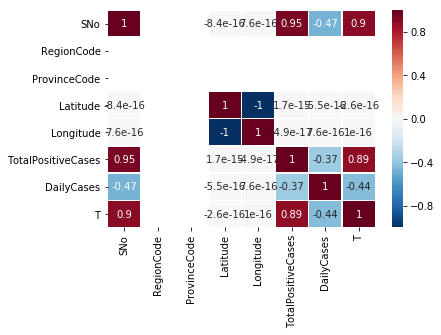

In [71]:
sb.heatmap(pearson, 
            xticklabels=pearson.columns,
            yticklabels=pearson.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)